# Web Crawling

In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import numpy
import pandas

In [30]:
# https://www.youtube.com/watch?v=4VfqVpTz4Q4

session = HTMLSession()

def getdata(url):
    get_url = session.get(url)
    page_url = BeautifulSoup(get_url.text, 'html.parser')
    return page_url

def nextpage(page_url):
    nextpage = page_url.find('div',{'class':'gsc_pgn'})
    #if nextpage:
    if not nextpage.find('button',{'class':'disabled'}):
        url = 'https://scholar.google.co.uk' + str(nextpage.find('button',{'aria-label':'Next'})['onclick'][17:-1].replace('\\x3d','=').replace('\\x26','&'))
        page_list.append(url)
        return url
    else:
        return "Page Not Found"

def eachpagelist(page_list):
    for i in range(0,len(page_list)):
        page_content = requests.get(page_list[i]).text
        pages = BeautifulSoup(page_content, 'lxml')
        for profiles in pages.find_all("h3", attrs={"class": "gs_ai_name"}):
            #for profile_field in pages.find_all("div", attrs={"class": "gs_ai_int"}):
            profile_links.append({"Name": profiles.a.text, "Profile": "https://scholar.google.co.uk"+profiles.a['href']})
    return profile_links

def tagging(page_list):
    for i in range(0,len(page_list)):
        page_content = requests.get(page_list[i]).text
        pages = BeautifulSoup(page_content, 'lxml')
        for j in range(0,10):
            tag = pages.find_all('div', {'class':'gs_ai_int'})[j].text
            #print(tag)
            tags.append(tag)
    return tags

def publications(profile_links):
    for j in range(695,len(profile_links)):
        publ_content = requests.get(profile_links[j]['Profile']).text
        publ = BeautifulSoup(publ_content, 'lxml')
        #for i in range(0,20):
        for i in range(0,20):
            title = publ.find_all("a", attrs={"class": "gsc_a_at"})[i].text
            authors = publ.find_all('div', attrs={'class':'gs_gray'})[2*i].text
            publ_year = publ.find_all('div', attrs={'class':'gs_gray'})[1+(2*i)].text
            #cited_by = publ.find_all('a',{'class','gsc_a_ac gs_ibl'})[i].text
            #publ_year = publ.find_all('span',{'class':"gs_oph"})[0].text.replace(', ','')
            data_href = publ.find_all("a", attrs={"class": "gsc_a_at"})[i]['data-href']
            paper_link = profile_links[j]['Profile'] + '#d=gs_md_cita-d&u=' + data_href.replace('&oe=ASCII','').replace('/','%2F').replace('?','%3F').replace('=','%3D').replace('&','%26').replace(':','%3A') + "%26tzom%3D0"
            papers = papers.append({'title':title, 'authors':authors,'cu_author':profile_links[j]['Name'],'publ_year':publ_year,'paper_link':paper_link,'cited_by':0}, ignore_index=True)
            print('j - ', j, ' i - ',i)
        sleep(10)
    return papers


In [ ]:
session = HTMLSession()
url = 'https://scholar.google.co.uk/citations?view_op=view_org&hl=en&org=9117984065169182779'
i = 0
profile_links = []
page_list = [url]
papers = []
tags = []

In [ ]:
while True:
    page_url = getdata(url)
    url = nextpage(page_url)
    if i > 69:
        print("Exceeds limit i")
        break
    else:
        print(url)
        i = i+1

In [ ]:
numpy.savetxt("page_list.csv",page_list, fmt ='% s', delimiter =", ") 

In [ ]:
profiles = eachpagelist(page_list)
pandas.DataFrame(profiles).to_csv("profiles.csv", index=True)

In [58]:
tags = pandas.read_csv('tags_final.csv')
tags = tags['0']

In [65]:
#tags = list(tags)
tags = [x for x in tags if str(x)!='nan']
tags

['sonochemistry ultrasound chemistry environment food technology ',
 'social work race and racism critical pedagogy neoliberalism higher education ',
 'Forecast Information Sharing ARIMA Modelling Supply Chain Management Demand Planning and Forecasting ',
 'm/eHealth epidemiology primary prevention diet and lifestyle validation ',
 'Biomedical Engineering Machine Intelligence Bioethics Cybernetics Cyborgs ',
 'food geographies short food chains local foods community foods ',
 'photoplethysmography pulse capillaroscopy microvascular thermal imaging ',
 'Health psychology self-management ',
 'Machine Learning Data Science ',
 'Age related changes in immunity use of technolgy to determine health status ',
 'Food sovereignty agroecology environment participatory democracy transdisciplinary research ',
 'Physical activity obesity exercise children sports science ',
 'literacy language acquisition ',
 'Human Factors Safety Aviation Automotive Defence ',
 'River processes Hydrology Water Poll

In [ ]:
papers.to_csv('papers.csv') 

# Search Engine

In [2]:
papers = pandas.read_csv('papers.csv')
papers = papers.drop_duplicates()
papers = papers.drop(['Unnamed: 0','cited_by'], axis =1)
papers

,authors,cu_author,paper_link,publ_year,title
0,"TJ Mason, JP Lorimer",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&u...,"Wiley, 1988",Sonochemistry
1,"TJ Mason, JP Lorimer",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&u...,"Wiley-Vch, 2002",Applied sonochemistry: the uses of power ultra...
2,"TJ Mason, L Paniwnyk, JP Lorimer",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&u...,"Ultrasonics sonochemistry 3 (3), S253-S260, 1996",The uses of ultrasound in food technology
3,"TJ Mason, D Peters",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&u...,"Ellis Horwood, 1991",Practical sonochemistry
4,TJ Mason,Timothy Mason,https://scholar.google.co.uk/citations?hl=en&u...,"Chemical Society Reviews 26 (6), 443-451, 1997",Ultrasound in synthetic organic chemistry
...,...,...,...,...,...
10036,L Graham,Luke D. Graham,https://scholar.google.co.uk/citations?hl=en&u...,"Contemporary Challenges to Human Rights Law, 3...",Using a Human Rights Framework to Tackle Desti...
10037,LD Graham,Luke D. Graham,https://scholar.google.co.uk/citations?hl=en&u...,"QMLJ 9, 5, 2018",Austerity Policies as Crimes against Humanity:...
10038,H Hami,Dr Heliza Abdul Hami,https://scholar.google.co.uk/citations?hl=en&u...,Institute for Small Business and Entrepreneurs...,A Critical Evaluation Of The Factors That Infl...
10039,H Hami,Dr Heliza Abdul Hami,https://scholar.google.co.uk/citations?hl=en&u...,"British Academy of Management, 2017: Re-connec...",Millennial Generation Entrepreneurship: A Syst...


In [3]:
pandas.set_option("display.max_colwidth", -1)

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [4]:
import nltk, os, string, copy, math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
from collections import defaultdict

## Data pre-processing

In [5]:
# https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/

def token_sw(words):
    stop_words = stopwords.words('english')

    nltk.download("punkt")

    filtered_words = []
    for title in words:
        tokens = word_tokenize(title)
        # tokenize the words, remove stop words, and remove single letter words
        word = [wrd for wrd in tokens if wrd.isalpha() if wrd.lower() not in stop_words if len(wrd)>1]
        filtered_words.append(word)

    #print('filtered words -  ',filtered_words)
    return filtered_words

In [6]:
def word_stem(filtered_words):
    word_stemming = PorterStemmer()

    stemmed_words = []
    for i in range(len(filtered_words)):
        stem_w = [word_stemming.stem(word) for word in filtered_words[i]]
        stemmed_words.append(stem_w)
        #print(stemmed_words)
    return stemmed_words

In [8]:
papers = papers.drop_duplicates(subset=['title'])
len(papers)

9402

In [9]:
filtered_words = token_sw(papers['title'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
filtered_words

[['Sonochemistry'],
 ['Applied',
  'sonochemistry',
  'uses',
  'power',
  'ultrasound',
  'chemistry',
  'processing'],
 ['uses', 'ultrasound', 'food', 'technology'],
 ['Practical', 'sonochemistry'],
 ['Ultrasound', 'synthetic', 'organic', 'chemistry'],
 ['Investigation',
  'effects',
  'ultrasound',
  'vegetal',
  'tissues',
  'solvent',
  'extraction'],
 ['Microwave', 'ultrasonic', 'processing', 'realistic', 'option', 'industry'],
 ['Quantifying', 'sonochemistry', 'casting', 'light', 'black', 'art'],
 ['Potential',
  'use',
  'ultrasound',
  'extraction',
  'antioxidants',
  'Rosmarinus',
  'officinalis',
  'food',
  'pharmaceutical',
  'industry'],
 ['Sonochemistry', 'Part', 'physical', 'aspects'],
 ['Effect',
  'ultrasound',
  'treatment',
  'solubility',
  'foaming',
  'properties',
  'whey',
  'protein',
  'suspensions'],
 ['development',
  'evaluation',
  'ultrasound',
  'treatment',
  'bacterial',
  'suspensions',
  'study',
  'frequency',
  'power',
  'sonication',
  'time',


In [11]:
stemmed_words = word_stem(filtered_words)

In [12]:
print(stemmed_words)

[['sonochemistri'], ['appli', 'sonochemistri', 'use', 'power', 'ultrasound', 'chemistri', 'process'], ['use', 'ultrasound', 'food', 'technolog'], ['practic', 'sonochemistri'], ['ultrasound', 'synthet', 'organ', 'chemistri'], ['investig', 'effect', 'ultrasound', 'veget', 'tissu', 'solvent', 'extract'], ['microwav', 'ultrason', 'process', 'realist', 'option', 'industri'], ['quantifi', 'sonochemistri', 'cast', 'light', 'black', 'art'], ['potenti', 'use', 'ultrasound', 'extract', 'antioxid', 'rosmarinu', 'officinali', 'food', 'pharmaceut', 'industri'], ['sonochemistri', 'part', 'physic', 'aspect'], ['effect', 'ultrasound', 'treatment', 'solubl', 'foam', 'properti', 'whey', 'protein', 'suspens'], ['develop', 'evalu', 'ultrasound', 'treatment', 'bacteri', 'suspens', 'studi', 'frequenc', 'power', 'sonic', 'time', 'cultur', 'bacillu', 'speci'], ['physic', 'properti', 'ultrasound', 'treat', 'soy', 'protein'], ['practic', 'sonochemistri', 'power', 'ultrasound', 'use', 'applic'], ['ultrasound', '

### Inverted index and TF - IDF (Term frequency - Inverse document frequency)

In [13]:
#https://stackoverflow.com/questions/28019543/inverted-index-given-a-list-of-document-tokens-using-python

inverted_index = defaultdict(list)
for index, words in enumerate(stemmed_words):
    for word in words:
        inverted_index[word].append(index)
        
inverted_index

defaultdict(list,
            {'sonochemistri': [0, 1, 3, 7, 9, 13, 15],
             'appli': [1,
              196,
              902,
              1077,
              1223,
              1778,
              1787,
              1926,
              2312,
              2857,
              2976,
              3023,
              3024,
              3053,
              3647,
              3680,
              3693,
              3931,
              3933,
              4134,
              4408,
              5054,
              5450,
              5695,
              5718,
              5805,
              5814,
              6298,
              6299,
              6492,
              6545,
              6653,
              6949,
              7083,
              7149,
              8175,
              8923,
              8925,
              8970,
              9208],
             'use': [1,
              2,
              8,
              13,
              15,
              16,
          

In [14]:
#https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
def documentfreq(f_word):
    word_f = 0
    try:
        word_f = docfreq[f_word]
    except:
        pass
    return word_f

In [15]:
#
docfreq = {}
for w_i in range(len(stemmed_words)):
    tokens = stemmed_words[w_i]
    for word in tokens:
        try:
            docfreq[word].add(w_i)
        except:
            docfreq[word] = {w_i}

for w_i in docfreq:
    docfreq[w_i] = len(docfreq[w_i])
docfreq


{'sonochemistri': 7,
 'appli': 40,
 'use': 654,
 'power': 132,
 'ultrasound': 22,
 'chemistri': 9,
 'process': 185,
 'food': 137,
 'technolog': 150,
 'practic': 174,
 'synthet': 8,
 'organ': 54,
 'investig': 169,
 'effect': 434,
 'veget': 23,
 'tissu': 9,
 'solvent': 2,
 'extract': 21,
 'microwav': 3,
 'ultrason': 8,
 'realist': 8,
 'option': 12,
 'industri': 169,
 'quantifi': 9,
 'cast': 8,
 'light': 28,
 'black': 17,
 'art': 35,
 'potenti': 97,
 'antioxid': 5,
 'rosmarinu': 1,
 'officinali': 1,
 'pharmaceut': 2,
 'part': 40,
 'physic': 74,
 'aspect': 23,
 'treatment': 71,
 'solubl': 3,
 'foam': 4,
 'properti': 121,
 'whey': 2,
 'protein': 46,
 'suspens': 11,
 'develop': 420,
 'evalu': 207,
 'bacteri': 8,
 'studi': 497,
 'frequenc': 37,
 'sonic': 1,
 'time': 99,
 'cultur': 107,
 'bacillu': 1,
 'speci': 25,
 'treat': 12,
 'soy': 1,
 'applic': 217,
 'dosimetri': 1,
 'aqueou': 12,
 'terephthal': 2,
 'ion': 19,
 'fluoresc': 1,
 'monitor': 81,
 'bioactiv': 2,
 'principl': 22,
 'plant': 36,

In [16]:
document = 0

tf_idfreq = {}

for w_i in range(len(papers)):
    
    w_token = stemmed_words[w_i]
    
    w_counter = Counter(w_token + stemmed_words[w_i])
    w_count = len(w_token + stemmed_words[w_i])
    
    for w_t in numpy.unique(w_token):
        
        term_f = w_counter[w_t]/w_count
        docfreq = documentfreq(w_t)
        idfreq = numpy.log((len(papers)+1)/(docfreq+1))
        
        tf_idfreq[document, w_t] = term_f*idfreq

    document += 1

### query processing

In [17]:
nltk. download("punkt")
def query_processing(query):
    stop_words = stopwords.words('english')
    query = numpy.char.lower(query)

    punc_words = nltk. word_tokenize(str(query))
    query = [word for word in punc_words if word.isalnum() if word.lower() not in stop_words]

    #stop_words = stopwords.words('english')
    words = word_tokenize(str(query))
    processed_query = ""
    for w_i in words:
        if w_i.lower() not in stop_words and len(w_i) > 1:
            processed_query = processed_query + " " + w_i
    query = processed_query
    
    query = numpy.char.replace(query, "'", "")
    word_stemming= PorterStemmer()
    
    w_token = word_tokenize(str(query))
    processed_query = ""
    for w_i in w_token:
        processed_query = processed_query + " " + word_stemming.stem(w_i)
    return processed_query

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Ranking retrieval - Matching score

In [25]:
def score_match(num_of_links, search_query):
    query_process = query_processing(search_query)
    query_process = word_tokenize(str(query_process))

    print("Weighted query\n")
    print("Given query - ", search_query)
    print(query_process)
    
    weighted_q = {}

    for key in tf_idfreq:
        
        if key[1] in query_process:
#             print(key)
            try:
                weighted_q[key[0]] += tf_idfreq[key]
            except:
                weighted_q[key[0]] = tf_idfreq[key]
#     print('no sort - ' , weighted_q)
        
#     print('items - ',weighted_q.items())
    weighted_q = sorted(weighted_q.items(), key=lambda query_sort: query_sort[1], reverse=True)
    
    
#     print('sort - ' , weighted_q)

    
    l = []
    
    for w_i in weighted_q[:num_of_links]:
#         print('w_i - ',w_i)
        l.append(w_i[0])

    return l
    

postings = score_match(10, "which machine learning algorithm is suitable for text classification")
print(postings)
for i in range(len(postings)):
    print('\n',papers.iloc[postings[i]],'\n')

#[0, 3, 17, 13, 14, 1, 9, 2, 4, 7812, 9316, 18, 421, 987, 1453, 3221, 7, 9325, 12, 3212]

Weighted query

Given query -  which machine learning algorithm is suitable for text classification
['machin', 'learn', 'algorithm', 'suitabl', 'text', 'classif']
[7984, 3470, 5340, 1566, 2487, 3670, 4874, 7980, 1541, 199]

 authors       A Ștefan, IA Stefan, JB Hauge, M Loizou, J Calderwood, S Arnab, ...                                                                                                                                                
cu_author     Michael Loizou                                                                                                                                                                                                     
paper_link    https://scholar.google.co.uk/citations?hl=en&user=imhDcMYAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DimhDcMYAAAAJ%26citation_for_view%3DimhDcMYAAAAJ%3AIjCSPb-OGe4C%26tzom%3D0
publ_year     15th International Scientific Conference on eLearning and Software for …, 2019     

In [22]:
papers

,authors,cu_author,paper_link,publ_year,title
0,"TJ Mason, JP Lorimer",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&user=ywiPqccAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DywiPqccAAAAJ%26citation_for_view%3DywiPqccAAAAJ%3AwMgC3FpKEyYC%26tzom%3D0,"Wiley, 1988",Sonochemistry
1,"TJ Mason, JP Lorimer",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&user=ywiPqccAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DywiPqccAAAAJ%26citation_for_view%3DywiPqccAAAAJ%3APELIpwtuRlgC%26tzom%3D0,"Wiley-Vch, 2002",Applied sonochemistry: the uses of power ultrasound in chemistry and processing
2,"TJ Mason, L Paniwnyk, JP Lorimer",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&user=ywiPqccAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DywiPqccAAAAJ%26citation_for_view%3DywiPqccAAAAJ%3Ab1wdh0AR-JQC%26tzom%3D0,"Ultrasonics sonochemistry 3 (3), S253-S260, 1996",The uses of ultrasound in food technology
3,"TJ Mason, D Peters",Timothy Mason,https://scholar.google.co.uk/citations?hl=en&user=ywiPqccAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DywiPqccAAAAJ%26citation_for_view%3DywiPqccAAAAJ%3A1yWc8FF-_SYC%26tzom%3D0,"Ellis Horwood, 1991",Practical sonochemistry
4,TJ Mason,Timothy Mason,https://scholar.google.co.uk/citations?hl=en&user=ywiPqccAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DywiPqccAAAAJ%26citation_for_view%3DywiPqccAAAAJ%3A5awf1xo2G04C%26tzom%3D0,"Chemical Society Reviews 26 (6), 443-451, 1997",Ultrasound in synthetic organic chemistry
...,...,...,...,...,...
10036,L Graham,Luke D. Graham,https://scholar.google.co.uk/citations?hl=en&user=3is_mUAAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3D3is_mUAAAAAJ%26citation_for_view%3D3is_mUAAAAAJ%3Ad1gkVwhDpl0C%26tzom%3D0,"Contemporary Challenges to Human Rights Law, 318-356, 2020",Using a Human Rights Framework to Tackle Destitution: The Component Rights
10037,LD Graham,Luke D. Graham,https://scholar.google.co.uk/citations?hl=en&user=3is_mUAAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3D3is_mUAAAAAJ%26citation_for_view%3D3is_mUAAAAAJ%3Au-x6o8ySG0sC%26tzom%3D0,"QMLJ 9, 5, 2018",Austerity Policies as Crimes against Humanity: An Assessment of UK Social Security Policy since 2008
10038,H Hami,Dr Heliza Abdul Hami,https://scholar.google.co.uk/citations?hl=en&user=XgGkA1QAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DXgGkA1QAAAAJ%26citation_for_view%3DXgGkA1QAAAAJ%3Au5HHmVD_uO8C%26tzom%3D0,"Institute for Small Business and Entrepreneurship 2017:‘Borders’, prosperity …, 2017",A Critical Evaluation Of The Factors That Influence The Millennial Generation In Identifying Entrepreneurial Opportunity In Malaysia
10039,H Hami,Dr Heliza Abdul Hami,https://scholar.google.co.uk/citations?hl=en&user=XgGkA1QAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DXgGkA1QAAAAJ%26citation_for_view%3DXgGkA1QAAAAJ%3Au-x6o8ySG0sC%26tzom%3D0,"British Academy of Management, 2017: Re-connecting management research with …, 2017",Millennial Generation Entrepreneurship: A Systematic Literature Review


# Subject Classification

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import seaborn as sns
# import eli5
from IPython.display import Image

In [40]:
# Step 1 - Get the file details
directory = []
file = []
title = []
text = []
label = []
datapath = 'C:/Users/LENOVO/Desktop/Information retrieval/sub_class/' 
for dirname, _ , filenames in os.walk(datapath):
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('/')[-1])
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)

In [43]:
fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text', 'label'])

df = fulldf.filter(['title','text','label'], axis=1)

print("FullDf : ", fulldf.shape)
print("DF : ", df.shape)

FullDf :  (140, 5)
DF :  (140, 3)


In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print("Train DF: ",train.shape)
print("Test DF: ",test.shape)

Train DF:  (112, 3)
Test DF:  (28, 3)


In [45]:
df.head()

,title,text,label
0,Arts Based Research,"Preface Acknowledgments 1. What Is and What Is Not Arts Based Research? 2. Why Do Arts Based Research? Arts Based Research Example I: ?Notes From a Marine Biologist?s Daughter? 3. Yes, But Is It Research? 4. Who Can Do Arts Based Research? 5. Who Can Be the Audience for Arts Based Research? Arts Based Research Example II: ?Broken & Buried in Arkansas? 6. Can Arts Based Research Be Fictive? 7. How Might Arts Based Research Be Both Political and Ethical? Arts Based Research Example III: ?Ways of Being at Risk"" 8. What are Some Criteria for Assessing Arts Based Research? 9. Is There a Place for Theory in Arts Based Research? 10. What Are Some Fundamental Ideas from Arts Based Research? References Additional Readings Index About the Authors",art
1,The Arts and the Creation of Mind,"Although the arts are often thought to be closer to the rim of education than to its core, they are, surprisingly, critically important means for developing complex and subtle aspects of the mind, argues Elliot Eisner in this engrossing book. In it he describes how various forms of thinking are evoked, developed, and refined through the arts. These forms of thinking, Eisner argues, are more helpful in dealing with the ambiguities and uncertainties of daily life than are the formally structured curricula that are employed today in schools. Offering a rich array of examples, Eisner describes different approaches to the teaching of the arts and the virtues each possesses when well taught. He discusses especially nettlesome issues pertaining to the evaluation of performance in the arts. Perhaps most important, Eisner provides a fresh and admittedly iconoclastic perspective on what the arts can contribute to education, namely a new vision of both its aims and its means. This new perspective, Eisner argues, is especially important today, a time at which mechanistic forms of technical rationality often dominate our thinking about the conduct and assessment of education.",art
2,Creating Music by Listening,"Automated creation of new music by listening is disclosed. A method to create new music may comprise listening to a plurality of music, learning from the plurality of music, and performing concatenative synthesis based on the listening and the learning to create the new music. The method may be performed on a computing device having an audio interface, such as a personal computer.",art
3,The Wow Factor: Global Research Compendium on the Impact of the Arts in Education,"Commissioned by UNESCO in 2004, and carried out in collaboration with the Australia Council for the Arts and the International Federation of Arts and Cultural Agencies (IFACCA), Bamford conducted the first international research and analysis of the impact of the arts in education on children and young people. ‘The Wow Factor’ (also available in Korean, Mandarin, Spanish) is the direct outcome of the research project and provides a knowledge base for understanding the organisational frameworks and conditions that regulate arts-rich education around the world.The research, led by Bamford, used an extensive survey process distributed to every country in the world and completed by the Ministries of Education, Arts and Culture. Case studies were used to determine the impact of art-rich programmes on the education of children and young people, and the results were analysed using numerical and qualitative triangulation, and cross-checked with 170 empirical case studies. Using extensive quantitative and qualitative methods to draw conclusions about the role of arts-rich programmes, Bamford developed internationally comparable standards for quality arts education, and identified a number of concrete educational, cultural and social benefits of arts education. This research has become a reference point for national policies in arts education including The Netherlands, Belgium, Denmark, Australia, Czech Republic, Korea, France, Germany and South Africa; was featur

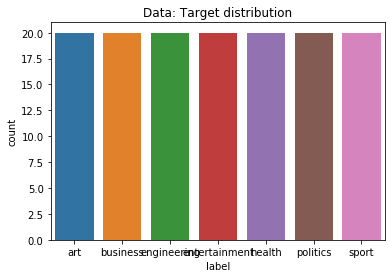

In [46]:
sns.countplot(df['label']);
plt.title('Data: Target distribution');

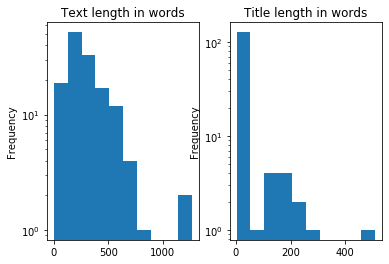

In [47]:
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
df['text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Text length in words');
plt.subplot(1, 2, 2)
df['title'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Title length in words');

In [48]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
        
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

ModuleNotFoundError: No module named 'wordcloud'

In [49]:
plot_wordcloud(df["title"], title="Word Cloud of Titles")

NameError: name 'plot_wordcloud' is not defined

In [50]:
text_transformer = TfidfVectorizer(stop_words='english', 
                                   ngram_range=(1, 2), lowercase=True, max_features=150000)

In [51]:
X_train_text = text_transformer.fit_transform(train['text'])
X_test_text = text_transformer.transform(test['text'])

In [52]:
X_train = X_train_text
X_test = X_test_text
print("X Train DF: ",X_train.shape)
print("X Test DF: ", X_test.shape)

X Train DF:  (112, 22745)
X Test DF:  (28, 22745)


In [53]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial',
                           random_state=17, n_jobs=4)

In [54]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [55]:
cv_results = cross_val_score(logit, X_train, train['label'], cv=skf, scoring='f1_macro')

In [ ]:
cv_results, cv_results.mean()

In [56]:
logit.fit(X_train, train['label'])

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
eli5.show_weights(estimator=logit, 
                  feature_names= text_transformer.get_feature_names(),top=(50, 5))

NameError: name 'eli5' is not defined

In [67]:
logit.predict(X_test)

array(['sport', 'engineering', 'entertainment', 'health', 'sport',
       'politics', 'politics', 'entertainment', 'business', 'health',
       'entertainment', 'health', 'entertainment', 'engineering', 'sport',
       'entertainment', 'engineering', 'sport', 'business', 'health',
       'sport', 'business', 'engineering', 'health', 'engineering',
       'sport', 'politics', 'health'], dtype=object)

In [68]:
logit.predict('covid virus was presented in the museums')

ValueError: Expected 2D array, got scalar array instead:
array=covid virus was presented in the museums.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.